<a href="https://colab.research.google.com/github/KEEHWANG/AI12_-_Section1_Project/blob/main/H2O_titanic_220627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 기존 h2o 삭제
!pip uninstall h2o
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Found existing installation: h2o 3.36.1.2
Uninstalling h2o-3.36.1.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h2o-3.36.1.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h2o/*
Proceed (y/n)? y
  Successfully uninstalled h2o-3.36.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Using cached h2o-3.36.1.2-py2.py3-none-any.whl


In [ ]:
#### 1. h2o 분석 준비하기 ####
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
%matplotlib inline
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 27 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_0xesx5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('tested.csv')


Saving tested.csv to tested (5).csv


In [ ]:
# 데이터 확인
data.describe()

# var2~는 입력 feature
feature = data.drop('Survived', axis=1)
feature.describe()

# var1은 label
label = data['Survived']
label.describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
y = "Survived"
X = list(data.columns) 
X.remove(y)

train, valid = train_test_split(data,
                                test_size=0.2, 
                                shuffle=True)

h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

h2o_train[y] = h2o_train[y].asfactor()
h2o_valid[y] = h2o_valid[y].asfactor()


In [ ]:
aml = H2OAutoML(max_runtime_secs=120, exclude_algos =['XGBoost', 'StackedEnsemble'])
aml.train(x = X, y = y, training_frame=h2o_train, leaderboard_frame=h2o_valid)


08:05:50.381: _train param, Dropping bad and constant columns: [Name]


08:05:51.335: _train param, Dropping bad and constant columns: [Name]


08:06:02.231: _train param, Dropping bad and constant columns: [Name]


08:06:02.881: _train param, Dropping bad and constant columns: [Name]


08:06:13.605: _train param, Dropping bad and constant columns: [Name]


08:06:25.437: _train param, Dropping bad and constant columns: [Name]


08:06:37.288: _train param, Dropping bad and constant columns: [Name]


08:06:38.87: _train param, Dropping bad and constant columns: [Name]


08:06:49.649: _train param, Dropping bad and constant columns: [Name]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_4_20220627_80550


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,692.0,692.0,58661.0,1.0,1.0,0.998555,1.0,2.0,1.998555




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 1.4761618735423126e-34
RMSE: 1.2149740217561496e-17
LogLoss: 6.648042063623693e-19
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,204.0,0.0,0.0,(0.0/204.0)
1,1,1.0,129.0,0.0077,(1.0/130.0)
2,Total,205.0,129.0,0.003,(1.0/334.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.000000e+00,1.000000,1.0
1,max f2,1.000000e+00,1.000000,1.0
2,max f0point5,1.000000e+00,1.000000,1.0
3,max accuracy,1.000000e+00,1.000000,1.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.000000e+00,1.000000,1.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,1.000000e+00,1.000000,1.0
8,max min_per_class_accuracy,1.000000e+00,1.000000,1.0
9,max mean_per_class_accuracy,1.000000e+00,1.000000,1.0



Gains/Lift Table: Avg response rate: 38.92 %, avg score: 38.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.386228,1.000000e+00,2.569231,2.569231,1.0,1.000000e+00,1.000000,1.000000,0.992308,0.992308,156.923077,156.923077,0.992308
1,2,0.401198,2.838280e-18,0.513846,2.492537,0.2,2.000000e-01,0.970149,0.970149,0.007692,1.000000,-48.615385,149.253731,0.980392
2,3,0.500000,2.232259e-18,0.000000,2.000000,0.0,2.371787e-18,0.778443,0.778443,0.000000,1.000000,-100.000000,100.000000,0.818627
3,4,0.598802,2.000897e-18,0.000000,1.670000,0.0,2.131846e-18,0.650000,0.650000,0.000000,1.000000,-100.000000,67.000000,0.656863
4,5,0.709581,1.833255e-18,0.000000,1.409283,0.0,1.903416e-18,0.548523,0.548523,0.000000,1.000000,-100.000000,40.928270,0.475490
5,6,0.802395,1.711913e-18,0.000000,1.246269,0.0,1.752171e-18,0.485075,0.485075,0.000000,1.000000,-100.000000,24.626866,0.323529
6,7,0.904192,1.488539e-18,0.000000,1.105960,0.0,1.596502e-18,0.430464,0.430464,0.000000,1.000000,-100.000000,10.596026,0.156863
7,8,1.000000,6.077990e-19,0.000000,1.000000,0.0,1.291275e-18,0.389222,0.389222,0.000000,1.000000,-100.000000,0.000000,0.000000




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 1.623778060896544e-33
RMSE: 4.0296129601942467e-17
LogLoss: 7.312846269986062e-18
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,204.0,0.0,0.0,(0.0/204.0)
1,1,0.0,130.0,0.0,(0.0/130.0)
2,Total,204.0,130.0,0.0,(0.0/334.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.000000e+00,1.0,0.0
1,max f2,1.000000e+00,1.0,0.0
2,max f0point5,1.000000e+00,1.0,0.0
3,max accuracy,1.000000e+00,1.0,0.0
4,max precision,1.000000e+00,1.0,0.0
5,max recall,1.000000e+00,1.0,0.0
6,max specificity,1.000000e+00,1.0,0.0
7,max absolute_mcc,1.000000e+00,1.0,0.0
8,max min_per_class_accuracy,1.000000e+00,1.0,0.0
9,max mean_per_class_accuracy,1.000000e+00,1.0,0.0



Gains/Lift Table: Avg response rate: 38.92 %, avg score: 38.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.389222,1.0,2.569231,2.569231,1.0,1.0,1.000000,1.000000,1.0,1.0,156.923077,156.923077,1.0
1,2,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.389222,0.389222,0.0,1.0,-100.000000,0.000000,0.0




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,auc,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,err,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,err_count,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,f0point5,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
5,f1,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
6,f2,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,lift_top_group,2.596772e+00,3.079597e-01,3.045454e+00,2.481482e+00,2.576923e+00,2.680000e+00,2.200000e+00
8,logloss,1.660062e-17,1.384602e-17,6.628197e-18,3.314098e-18,2.982689e-17,3.314099e-17,1.009294e-17
9,max_per_class_error,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-27 08:06:00,9.281 sec,0.0,0.487574,0.668399,0.5,0.389222,1.000000,0.610778
1,,2022-06-27 08:06:00,9.288 sec,5.0,0.391349,0.490787,1.0,1.000000,2.569231,0.000000
2,,2022-06-27 08:06:00,9.295 sec,10.0,0.258704,0.293226,1.0,1.000000,2.569231,0.000000
3,,2022-06-27 08:06:00,9.302 sec,15.0,0.210733,0.230539,1.0,1.000000,2.569231,0.000000
4,,2022-06-27 08:06:00,9.309 sec,20.0,0.190155,0.204652,1.0,1.000000,2.569231,0.000000
5,,2022-06-27 08:06:00,9.316 sec,25.0,0.155245,0.163194,1.0,1.000000,2.569231,0.000000
6,,2022-06-27 08:06:00,9.324 sec,30.0,0.114861,0.117568,1.0,1.000000,2.569231,0.000000
7,,2022-06-27 08:06:00,9.331 sec,35.0,0.076934,0.076913,1.0,1.000000,2.569231,0.000000
8,,2022-06-27 08:06:00,9.339 sec,40.0,0.051518,0.050761,1.0,1.000000,2.569231,0.000000
9,,2022-06-27 08:06:00,9.347 sec,45.0,0.042149,0.041275,1.0,1.000000,2.569231,0.000000



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Sex,4.151156e+02,1.000000e+00,9.803053e-01
1,Fare,5.955288e+00,1.434610e-02,1.406355e-02
2,SibSp,1.626738e+00,3.918758e-03,3.841580e-03
3,Embarked,6.055984e-01,1.458867e-03,1.430135e-03
4,PassengerId,1.522049e-01,3.666566e-04,3.594354e-04
5,Pclass,1.139432e-08,2.744855e-11,2.690796e-11
6,Age,1.068188e-33,2.573230e-36,2.522551e-36
7,Parch,0.000000e+00,0.000000e+00,0.000000e+00
8,Ticket,0.000000e+00,0.000000e+00,0.000000e+00
9,Cabin,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_valid)  # (Optional) Evaluate performance on a test set

model_id   =aml.leader.model_id  # 최고 모델 명
accuracy   =performance.accuracy()  # 정확도
precision  =performance.precision()  # precision
recall     =performance.recall()  # recall
F1         =performance.F1()  # f1
auc        =performance.auc()  # auc
variable_importance=aml.leader.varimp()  # 중요한 입력 변수

print(model_id, accuracy, precision, recall, F1, auc, variable_importance)
print(performance)

DRF_1_AutoML_2_20220627_75001 [[0.9090909090909091, 1.0]] [[1.0, 1.0]] [[0.9090909090909091, 1.0]] [[0.9090909090909091, 1.0]] 1.0 [('Sex', 1709.65380859375, 1.0, 0.8573385512570437), ('Cabin', 151.61630249023438, 0.08868245824278546, 0.07603089027178297), ('Parch', 31.95693016052246, 0.018692047477616627, 0.016025412904487717), ('Fare', 29.188222885131836, 0.01707259255553039, 0.014636991767760215), ('PassengerId', 23.335336685180664, 0.013649159009785024, 0.011701950211326119), ('Embarked', 15.858299255371094, 0.009275737096982867, 0.007952447004568508), ('Age', 13.729984283447266, 0.008030856430952332, 0.006885162817865986), ('Ticket', 9.947760581970215, 0.00581858182748272, 0.004988494514344598), ('SibSp', 8.465777397155762, 0.004951749503087505, 0.004245325745164828), ('Pclass', 0.38840579986572266, 0.0002271838882897585, 0.00019477350565528362)]

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0005137959683414224
RMSE: 0.022667067925548342
LogLoss: 0.01000873035954

,,0,1,Error,Rate
0,0,55.0,0.0,0.0,(0.0/55.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,55.0,29.0,0.0,(0.0/84.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.909091,1.000000,3.0
1,max f2,0.909091,1.000000,3.0
2,max f0point5,0.909091,1.000000,3.0
3,max accuracy,0.909091,1.000000,3.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.909091,1.000000,3.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.909091,1.000000,3.0
8,max min_per_class_accuracy,0.909091,1.000000,3.0
9,max mean_per_class_accuracy,0.909091,1.000000,3.0



Gains/Lift Table: Avg response rate: 34.52 %, avg score: 34.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.202381,1.000000,2.896552,2.896552,1.000000,1.000000,1.000000,1.000000,0.586207,0.586207,189.655172,189.655172,0.586207
1,2,0.202381,0.981818,0.000000,2.896552,0.000000,0.000000,1.000000,1.000000,0.000000,0.586207,-100.000000,189.655172,0.586207
2,3,0.297619,0.942424,2.896552,2.896552,1.000000,0.969697,1.000000,0.990303,0.275862,0.862069,189.655172,189.655172,0.862069
3,4,0.428571,0.030303,1.053292,2.333333,0.363636,0.360882,0.805556,0.797980,0.137931,1.000000,5.329154,133.333333,0.872727
4,5,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.345238,0.341991,0.000000,1.000000,-100.000000,0.000000,0.000000


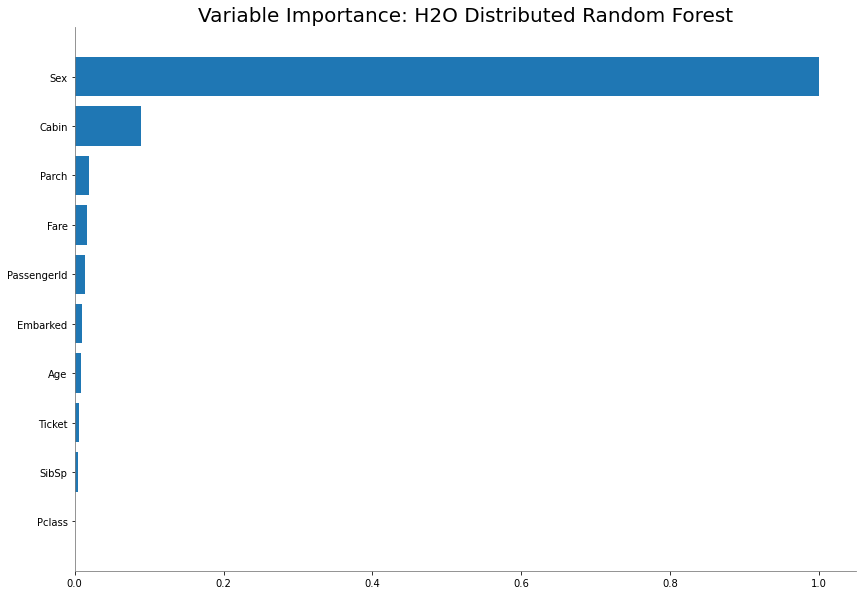

/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'Cabin' has levels not trained on: ["B11", "B24", "C22 C26"]
  warnings.warn(w)


predict
1
0
1
0
0
0
0
1
1
0


Survived
1
0
1
0
0
0
0
1
1
0


<Figure size 432x288 with 0 Axes>

In [ ]:
## 중요 변수 시각화
aml.leader.varimp_plot()

## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['Survived'])